

## Support Vector Machine 

In [65]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 
There is access to 303 patients data. The features are listed below. 

In [73]:

heart_df = pd.read_csv("Heart (5).csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)


Use **Suppert Vector Machine** to predict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease have a 1 and if not a zero. 

Prepare data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 






In [74]:
#targets to 1's and 0's
heart_df['Target'] = np.where(heart_df['Target'] == 'No', 0, heart_df['Target'])

heart_df['Target'] = np.where(heart_df['Target'] == 'Yes', 1, heart_df['Target'])


#create train and test set
train_set = heart_df.sample(frac = 0.8, random_state=102)
test_set = heart_df.drop(train_set.index)

#create the train values for x and y
x_tra = np.array(pd.concat([train_set['Age'], train_set['Sex'], train_set['Chol']], axis = 1))

y_tra = train_set['Target']
y_tra = np.array(y_tra.astype('int'))


#create the test values for x and y
x_test = np.array(pd.concat([test_set['Age'], test_set['Sex'], test_set['Chol']], axis = 1))

y_test = test_set['Target']
y_test = np.array(y_test.astype('int'))

from sklearn import svm

#create a classifier
cls = svm.SVC()

#train the model
cls.fit(x_tra,y_tra)

#predict the response
pred = cls.predict(x_test)

pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Accuracy, Precision, Recall and F1 score of  **SVM** implementaion. 



In [75]:

#initialize the true positive and negative values
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0

#find the true negs, true positives, false positives, and false negs
for i in range(0,len(y_test)):
    if pred[i] == 0 and y_test[i] == 0:
        true_neg+=1
    if pred[i] ==0 and y_test[i] == 1:
        false_neg+=1
    if pred[i] == 1 and y_test[i] ==0:
        false_pos+=1
    if pred[i] ==1 and y_test[i] == 1:
        true_pos+=1
        
#calculate accuracy
accuracy = (true_pos+true_neg)/(true_pos + false_pos + false_neg + true_neg)

print('Accuracy: ', accuracy)

#calculate precision
precision = true_pos/(true_pos+false_pos)

print('Precision: ', precision)

#calculate recall
recall = true_pos/(true_pos+false_neg)

print('Recall: ', recall)

#calculate f1
f1 = 2 * (precision*recall)/(precision+recall)

print('f1-score: ', f1)



Accuracy:  0.6557377049180327
Precision:  0.6153846153846154
Recall:  0.3333333333333333
f1-score:  0.43243243243243246




Implement SVM from scratch using Hinge Loss function and Gradient Descent without libraries. 




Epoch 0 Cost is: 0.01 weights [0. 0. 0.]
Epoch 1 Cost is: 0.009848557140686337 weights [2.66859504e-05 3.96694215e-07 1.20136364e-04]
Epoch 2 Cost is: 0.009697144568430105 weights [5.33692322e-05 7.93348760e-07 2.40260714e-04]
Epoch 3 Cost is: 0.0095457622771742 weights [8.00498457e-05 1.18996364e-06 3.60373051e-04]
Epoch 4 Cost is: 0.009394410260862721 weights [1.06727791e-04 1.58653886e-06 4.80473378e-04]
Epoch 5 Cost is: 0.009243088513440984 weights [1.33403069e-04 1.98307442e-06 6.00561694e-04]
Epoch 6 Cost is: 0.009091797028855517 weights [1.60075679e-04 2.37957033e-06 7.20638001e-04]
Epoch 7 Cost is: 0.00894053580105405 weights [1.86745622e-04 2.77602659e-06 8.40702301e-04]
Epoch 8 Cost is: 0.008789304823985534 weights [2.13412898e-04 3.17244320e-06 9.60754595e-04]
Epoch 9 Cost is: 0.008638104091600119 weights [2.40077507e-04 3.56882017e-06 1.08079488e-03]
Epoch 10 Cost is: 0.008486933597849173 weights [2.66739449e-04 3.96515750e-06 1.20082317e-03]
Epoch 11 Cost is: 0.00833579333

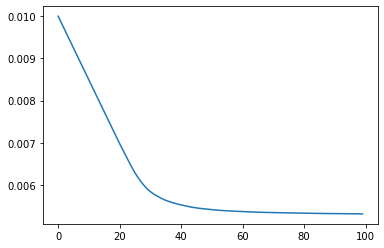

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        37
           1       0.62      0.33      0.43        24

    accuracy                           0.66        61
   macro avg       0.64      0.60      0.59        61
weighted avg       0.65      0.66      0.63        61



In [76]:
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw


weights = np.zeros(3)


# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001

regularization = 0.01

cost_list = []

for i in range(0, num_iterations):
    
    cost = compute_cost(x_tra, y_tra, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    
    cost_list.append(cost)
    
    grad = calculate_gradient(x_tra, y_tra, weights, regularization)
    
    weights = weights - learnin_rate * grad
    

#visualize costs
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

y_predict_2 = np.where(np.dot(x_test, weights)<0, -1, 1)

y_predict_2

from sklearn.metrics import *

class_report = classification_report(y_test,pred)
print(class_report)



Compare SVM results with Logistic Regression 

In [82]:
#SVM results 
from sklearn.metrics import *

class_report = classification_report(y_test,pred)
print('SVM class report\n')
print(class_report)
print('\n')


#Logistic Regression results

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_tra,y_tra)
y_pred=logreg.predict(x_test)


class_report_log = classification_report(y_test,y_pred)

print('Log class report\n')
print(class_report_log)

#SVM more accurate than log

SVM class report

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        37
           1       0.79      0.46      0.58        24

    accuracy                           0.74        61
   macro avg       0.75      0.69      0.69        61
weighted avg       0.75      0.74      0.72        61



Log class report

              precision    recall  f1-score   support

           0       0.76      0.68      0.71        37
           1       0.57      0.67      0.62        24

    accuracy                           0.67        61
   macro avg       0.66      0.67      0.66        61
weighted avg       0.68      0.67      0.68        61



Apply a kernel function to improve SVM performance 


In [78]:

from sklearn import svm

#create a classifier
cls = svm.SVC(kernel = 'poly', degree = 5)

#train the model
cls.fit(x_tra,y_tra)

#predict the response
pred = cls.predict(x_test)

pred


class_report = classification_report(y_test,pred, zero_division=0)
print(class_report)



              precision    recall  f1-score   support

           0       0.72      0.92      0.81        37
           1       0.79      0.46      0.58        24

    accuracy                           0.74        61
   macro avg       0.75      0.69      0.69        61
weighted avg       0.75      0.74      0.72        61

